# ε-greedy法

---

$\epsilon$-greedy法とは強化学習の行動選択時に用いられるアルゴリズムで，$\epsilon$[0,1]の確率で探索を行い，1-$\epsilon$の確率で状態行動価値関数の1番高い行動を選択してくれるというアルゴリズムです．

---
まず, $\epsilon$-greedy法のアルゴリズムを見ていきます．


In [7]:
# Q:状態価値関数,epsilon:[0,1]の任意の値,A:行動数とします 
import numpy as np
import random
A = 3
def epsilon_greedy(Q:np.ndarray,epsilon:float):
    if random.random()< epsilon:
        return np.random.choice(A)
    else:
        return Q.argmax(axis=-1)
    

---

今回はこの[論文](https://arxiv.org/pdf/1807.03765.pdf)のappendix Aに書かれている内容で$\epsilon$-greedy法が強化学習においてあまり良くないことを説明していきます．

まず，次のようなMDPを考えます．

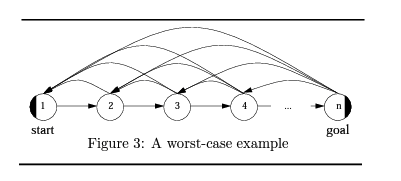

このMDPは状態が[1,n]まであり，各状態において最適な行動$a^*$が一つあり，それ以外の行動を選ぶとuniformな確率でそれ以前の状態に戻されるというMDPです．

しかしながら，[1,n/2]の状態までで$a^*$を選択しても報酬は0のままで[n/2 + 1,n]から$a^*$を選択すると，報酬が1生成される仕組みです．

初期の状態行動価値関数$Q(s_1,a_1) = 0$で初期化します．

このようなMDPを考えると,[1,n/2]まで進めても状態行動価値関数は0のままで学習が進まない確率は最大で$A^{-H/2}$で起きてしまい，iterationの数を$\Omega({A^{H/2}})$以上試行しないと，各iterationで$H/2$のリグレットが発生してしまいます．